# __Create a spatial domain__

### Problem statement

A model volume can consist of one or many so called “spatial domains”. Domains are used to delineate volumes to analyse or create fracture networks. Depending on the nature of the problem, domains can have many different shapes. 



<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/domains.png" width="800"/>
</div>
<br>
Example of domain geometries that can be handled in DFN.Lab
</center>

### What will you learn ?
- Create a box domain
- Create a spherical domain
- Create a complex domain from geometry files

### DFN.Lab model

Domain dimension can be anything, but we will consider meters here.
<br>
The required module to create spatial domains is __Domains__.

In [1]:
import dfnlab.Domains as dom

_____________

# Create a domain as a box

We create a cubic domain centered on (0,0,0) with side length 100m in each direction. Note that DFN.Lab operates unitless but that we use SI units here for the clarity of the tutorials. 

In [2]:
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)

To view the domain, we save it on the drive in the "Tmp" subdirectory, then view it using the supplied functions.

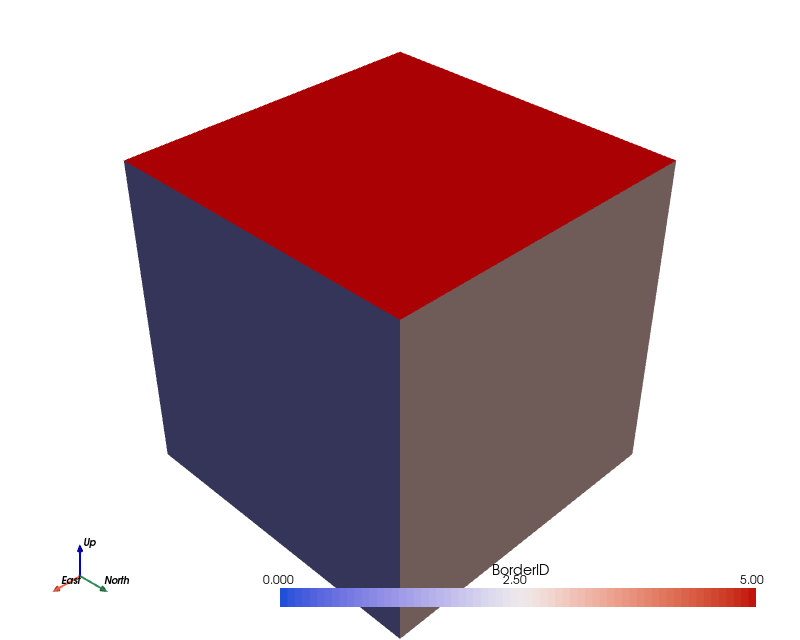

In [3]:
from sources.functions import plot_domain
plot_domain(domain,value="BorderID")

Or a parallelepiped, with different sizes in the x,y and z directions.

In [4]:
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100., L2=200., L3=50.)

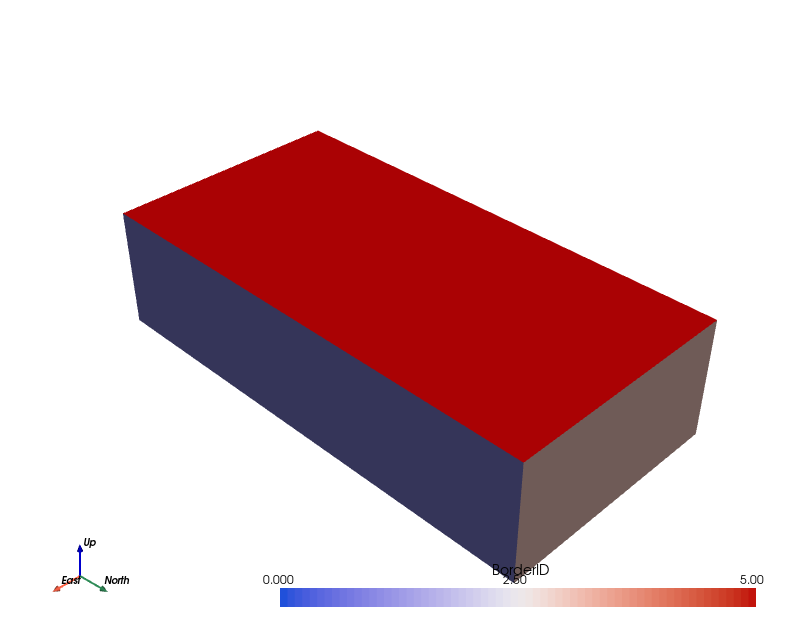

In [5]:
plot_domain(domain,value="BorderID")

_____________

# Create a spherical domain

We create a spherical domain centered on (0,0,0) of diameter 100m. The sphere is defined by a 3D polyhedron and the resolution depends on the division depth. This kind of spatial domain may be interesting to assess tensorial effective properties such as permability.

In [6]:
domain = dom.Domain()
domain.buildSphere(center=[0, 0, 0],diameter=100.,division=3)

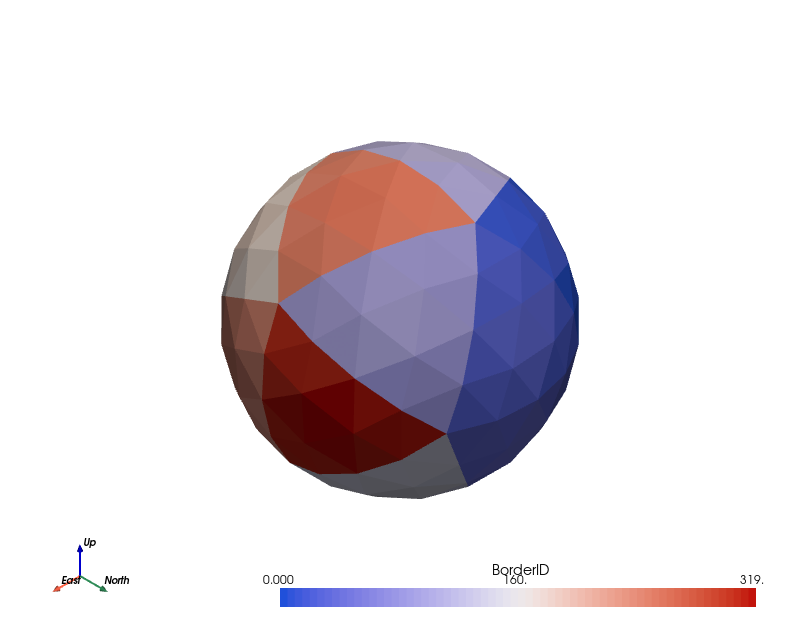

In [7]:
plot_domain(domain,value="BorderID")

_____________

# Create a complex domain from geometry files
The model volume may be divided in several sub-domains, that may be defined from different fracture properties. 
Here, we create complex sub-domains from imported geometries.

### Import sub-domain geometries¶ 

First, we import all sub-domains geometries. Currently, DFN.Lab only supports STL file format (either ASCII or binary).


In [8]:
import dfnlab.Geometry as geom
stlReaders = []
stlFileList=["./sources/STL-Example/domain1.stl","./sources/STL-Example/domain2.stl"]
for stlFile in stlFileList:   
    reader = geom.STLReader(stlFile)
    stlReaders.append(reader)

If needed, you can even rotate sub-domains using this command: 
```python
reader.rotate(axis, angle)
```
Or translate them using :
```python
reader.translate((x,y,z))
```

### Create the fracture domains

A fracture domain is described as a geometrical volume, to which you may assign properties.

In [9]:
fractureDomains = []
for reader in stlReaders:
    fractureDomain = dom.FractureDomain(reader.getDomain())
    fractureDomains.append(fractureDomain)

### Create the global domain and add the different fracture domains

We create a cubic domain (of size $L=20m$) centered in (0,0,0), and populate it with the different fracture domains. 

In [10]:
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=20) 
for fractureDomain in fractureDomains :
    domain.addFractureDomain(fractureDomain)

### Create an Octree from fracture domain geometry

An octree is a data structure discretizing the system volume according to the fracture domains. We need to provide a “resolution” limit  corresponding to the octree grid  refinement level (the larger, the more precise the discretization). A depth limit of 5 means that the system size may be splitted by half until 5 times, to catch properly the geometry. 


In [11]:
domain.populateOctree(limit=5)

Below we show the geometry of the two imported domains, and the obtained octree.

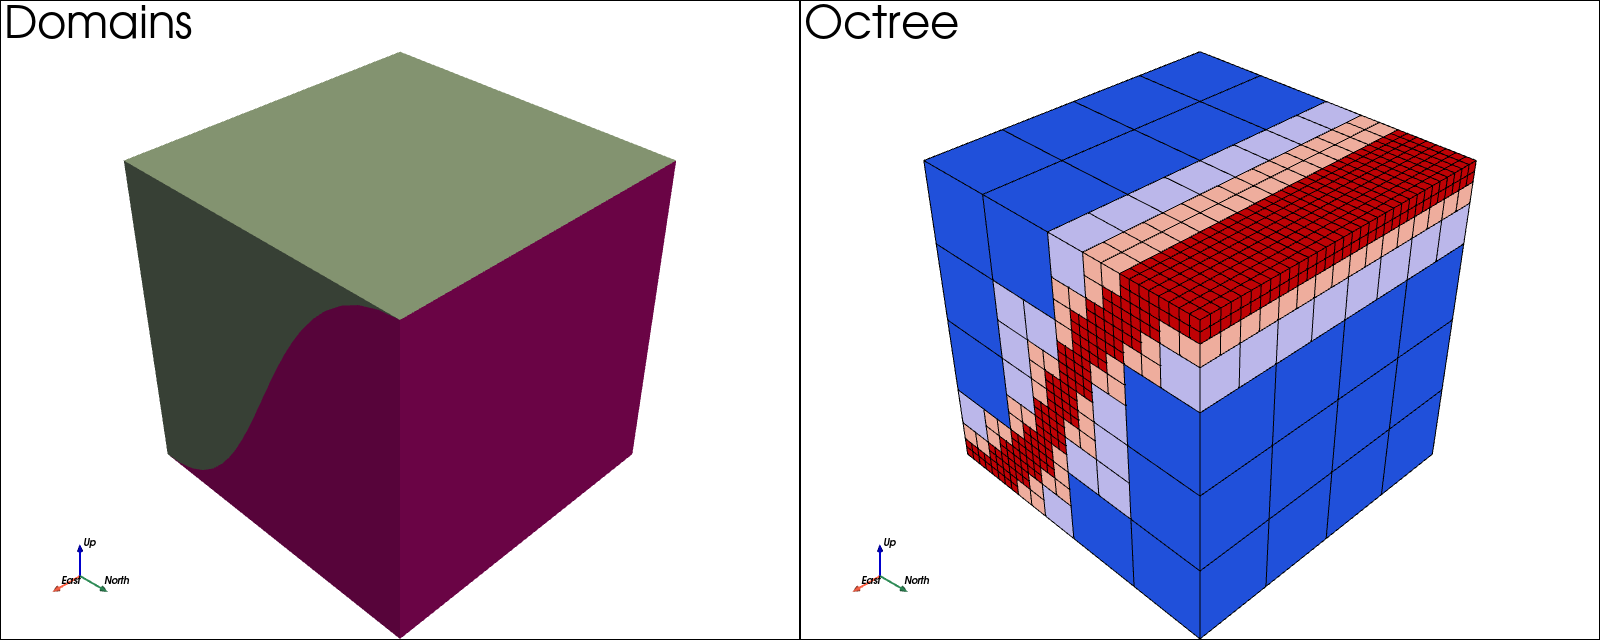

In [12]:
from sources.functions import plot_octree_and_domains
plot_octree_and_domains(domain,stlFileList)